# Random-time sampling of a Markov process 

There are situations in real-life where the state of a Markov system can only be probed at random, discrete times. This is, for example, the case in protein folding measurents in biology. Fluorescence markers are used, which are emitting single photons at a certain rate depending on the state of the protein structure. Transitions between different structures can be described with a Markov model. However, the state of the system can only be inferred from the timely distribute of photon arrival times. 
Here, we are defining a model of a random-time sampled Markov model. The polyspectra predicted from the model can afterwards be compared to the polyspectra calculated from the photon arrival time extrected by an experiment using the [SignalSnap](https://github.com/MarkusSifft/SignalSnap) library.

In [1]:
from markovanalyzer.polyspectra_calculator import System 
import numpy as np

Failed to import torch. This is only a problem when you want to use the CUDA backend.


In addition to the model transition rates, we now have to set the *blinking* rate *gamma_ph* of the emitting/probed state and the avarage time the detector will be in the *on* state (1/*gamma_det*). Which state is the blinking state is set via the measurenet operator. Here, the second state is emitting.

In [2]:
gamma_ph = 10
gamma_det = 1000

rates = {'0->1': 0.7, '1->0': 0.3}
m_op = np.array([0,1])

markov_system = System(rates, m_op, gamma_ph, gamma_det)

*gamma_det* mostly relates to the deadtime of the detector, which might be very short, hence, *gamma_det* is ofter larger compared to the other timescales.

In [3]:
f_data = np.linspace(0,1,100)

s1_m = markov_system.calculate_spectrum(f_data, order_in='all')

Calculating first order
Calculating power spectrum


  0%|          | 0/100 [00:00<?, ?it/s]

Calculating bispectrum


  0%|          | 0/100 [00:00<?, ?it/s]

Calculating correlation spectrum


  0%|          | 0/100 [00:00<?, ?it/s]

s1: [0.00693071+0.j]


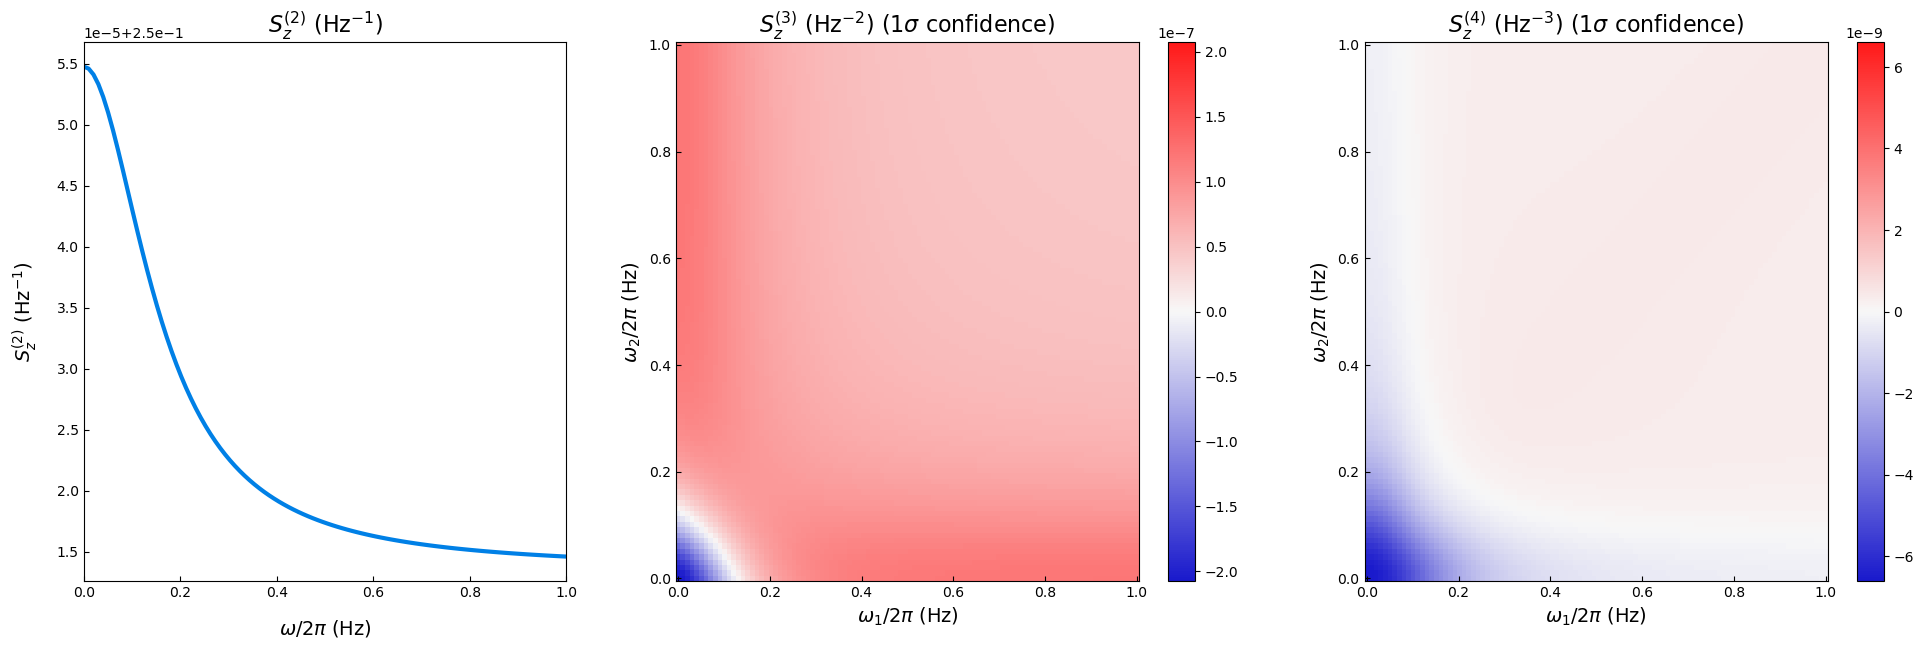

In [4]:
fig = markov_system.plot()